In [1]:
using DitherPunk
using Images
using TestImages

# Color dithering
## Defining a color scheme
Let's assume we want to recreate an image by stacking ``20 \times 20`` Rubik's cubes.
Dithering algorithms are perfect for this task!
We start out by defining a custom color scheme:

In [2]:
white = RGB{Float32}(1, 1, 1)
yellow = RGB{Float32}(1, 1, 0)
green = RGB{Float32}(0, 0.5, 0)
orange = RGB{Float32}(1, 0.5, 0)
red = RGB{Float32}(1, 0, 0)
blue = RGB{Float32}(0, 0, 1)

rubiks_colors = [white, yellow, green, orange, red, blue]

## Dithering the image
Now we only have to pick an image

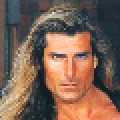

In [3]:
img = testimage("fabio_color_256")
img = imresize(img, 60, 60)

and run an `ErrorDiffusion` algorithm of our choice, e.g. `FloydSteinberg`

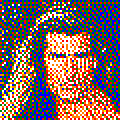

In [4]:
d = dither(img, FloydSteinberg(), rubiks_colors)

or simply quantize to the closest color:

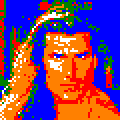

In [5]:
d = dither(img, ClosestColor(), rubiks_colors)

For an overview of all error diffusion algorithms, check out the gallery.

## Using ColorSchemes.jl
Predefined color schemes from
[ColorSchemes.jl](https://juliagraphics.github.io/ColorSchemes.jl/stable/basics/#Pre-defined-schemes)
can also be used by accessing the color scheme's `colors`.
Let's use the colors of the Brazilian flag 🇧🇷:

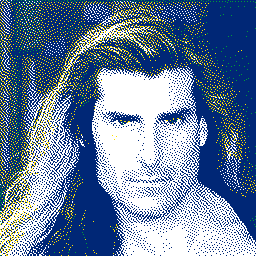

In [6]:
using ColorSchemes
cs = ColorSchemes.flag_br
colors = cs.colors

img = testimage("fabio_color_256")
d = dither(img, Atkinson(), colors)

# Separate-space dithering
All dithering algorithms in DitherPunk can also be applied to color images through the
meta-method `SeparateSpace`. This method takes any gray-scale dithering algorithm and
applies channel-wise binary dithering.

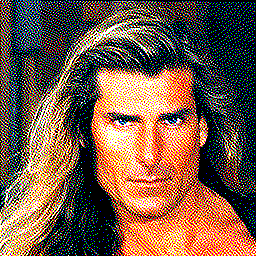

In [7]:
dither(img, SeparateSpace(Atkinson()))

Any algorithm can be used, not only error diffusion!

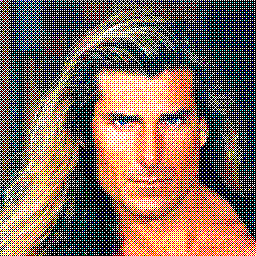

In [8]:
dither(img, SeparateSpace(Bayer()))

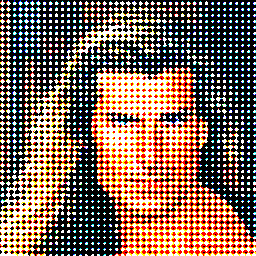

In [9]:
dither(img, SeparateSpace(ClusteredDots()))

Because the algorithm is applied channel-wise, the output of this algorithm depends on the
color type of input image. RGB is recommended, but feel free to experiment!

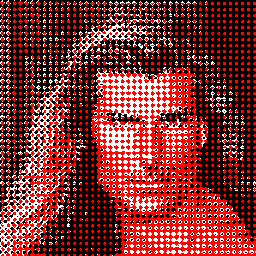

In [10]:
dither(HSV.(img), SeparateSpace(ClusteredDots()))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*